# Objective: 

* To predict which customer is more likely to purchase the newly introduced travel package.
* Identify which variables are most significant.
* Analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.


# Data:
**Tourism.xlxs** - it contains information about customer travel data.

Customer details:

* CustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

Customer interaction data:

* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer

# Loading libraries

In [767]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Library to split data 
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Loading and exploring the data

Loading the data into python to explore and understand it.

In [768]:
df = pd.read_excel('Tourism.xlsx', sheet_name = 1)

In [769]:
# copying data to another varaible to avoid any changes to original data
data = df.copy()

### View the first and last 5 rows of the dataset.

In [770]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [771]:
data.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


### Understand the shape of the dataset.

In [772]:
data.shape

(4888, 20)

* The dataset has 4888 rows and 20 columns 

### Check the data types of the columns for the dataset.

In [773]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

* There are 8 variables with missing values. 
* [Age, TypeofContact, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome]

### Summary of the dataset

In [774]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,4888,NaN,NaN,NaN,202444,1411.19,200000,201222,202444,203665,204887
ProdTaken,4888,NaN,NaN,NaN,0.188216,0.390925,0,0,0,0,1
Age,4662,NaN,NaN,NaN,37.6223,9.31639,18,31,36,44,61
TypeofContact,4863,2,Self Enquiry,3444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,4888,NaN,NaN,NaN,1.65426,0.916583,1,1,1,3,3
DurationOfPitch,4637,NaN,NaN,NaN,15.4908,8.51964,5,9,13,20,127
Occupation,4888,4,Salaried,2368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4888,3,Male,2916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,4888,NaN,NaN,NaN,2.90507,0.724891,1,2,3,3,5
NumberOfFollowups,4843,NaN,NaN,NaN,3.70845,1.00251,1,3,4,4,6


* `CustomerID`: The CustomerID attribute does not add any information to our analysis as all the values are unique. There is no association between a person's customer ID and ProdTaken, also it does not provide any general conclusion for future potential travel package customers. We can neglect this information for our model prediction.
* `ProdTaken`: This is the dependent variable we are interested in. It is split into 0 and 1 for product not taken or product taken, respectively.
* `Age`: Average age of customers is 36 years, age of customers has a wide range from 18 to 61 years. 
* `Type of Contact`: There are two types of contact for information on travel packages. This column does have missing values that will have to be treated.
* `Gender`: Initial observation shows that there were more men in the sample. We also notice that there are three unique genders. This will have to be investigated as we expect only two.

In [775]:
data.drop("CustomerID", axis = 1, inplace = True)

* Dropping CustomerID as there is not much value expected

In [776]:
data.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [777]:
for i in data:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in ProdTaken are :
0    3968
1     920
Name: ProdTaken, dtype: int64
**************************************************
Unique values in Age are :
35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
60.0     29
57.0     29
18.0     14
61.0      9
Name: Age, dtype: int64
**************************************************
Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Unique values in CityTier are :
1    3190
3    1500
2     198
Name

* We notice several missing values that need to be treated in 8 different columns.
* There are also outliers that will be addressed later in the analysis.
* We noticed two spellings for 'Female'; we will correct for this now.
* There are only two counts of Free Lancer under Occupation. We could drop this from the dataset,

In [778]:
data['Gender'].replace('Fe Male','Female',regex=True,inplace=True)

In [779]:
for i in data:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in ProdTaken are :
0    3968
1     920
Name: ProdTaken, dtype: int64
**************************************************
Unique values in Age are :
35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
60.0     29
57.0     29
18.0     14
61.0      9
Name: Age, dtype: int64
**************************************************
Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Unique values in CityTier are :
1    3190
3    1500
2     198
Name

* We can now see that Female has been consolidated from two categories to just one

## Changing Type of Contact column to categorical

In [780]:
data = pd.get_dummies(data, columns=["TypeofContact"], drop_first=True)

In [781]:
data.head()

,ProdTaken,Age,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TypeofContact_Self Enquiry
0,1,41.0,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,1
1,0,49.0,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,0
2,1,37.0,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,1
3,0,33.0,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,0
4,0,NaN,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,1


In [782]:
data = data.rename(columns = {'TypeofContact_Self Enquiry':'TypeofContact'})

* Here we rename the column for simplicitiy
* We know that 1 is a self inquiry and 0 is company invited

In [783]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4662 non-null   float64
 2   CityTier                  4888 non-null   int64  
 3   DurationOfPitch           4637 non-null   float64
 4   Occupation                4888 non-null   object 
 5   Gender                    4888 non-null   object 
 6   NumberOfPersonVisiting    4888 non-null   int64  
 7   NumberOfFollowups         4843 non-null   float64
 8   ProductPitched            4888 non-null   object 
 9   PreferredPropertyStar     4862 non-null   float64
 10  MaritalStatus             4888 non-null   object 
 11  NumberOfTrips             4748 non-null   float64
 12  Passport                  4888 non-null   int64  
 13  PitchSatisfactionScore    4888 non-null   int64  
 14  OwnCar  

## EDA

## Univariate analysis

In [784]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on Age

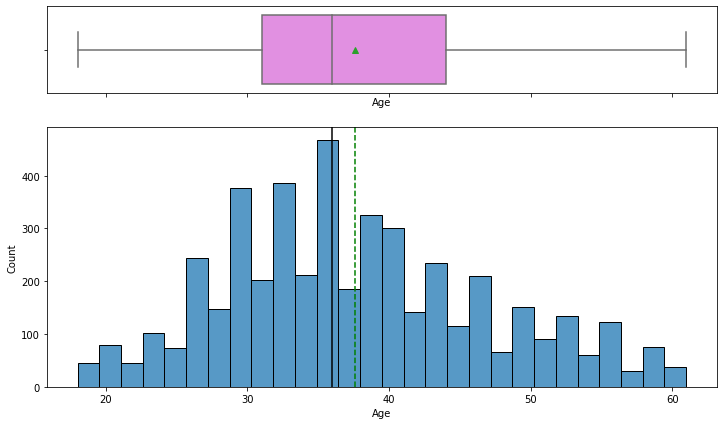

In [785]:
histogram_boxplot(data, "Age")

* The distribution of Age is mostly normally distributed.
* The mean and median are fairly close.
* There is a slight tail on the right.

### Observations on Monthly Income

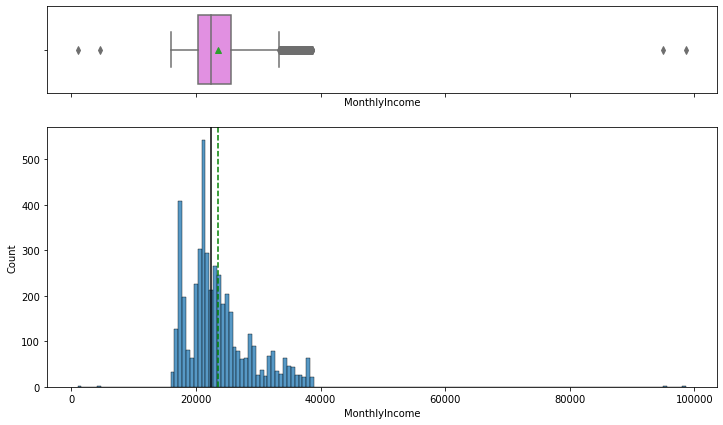

In [786]:
histogram_boxplot(data, "MonthlyIncome")

* The distribution  of monthly income appears to be mostly normally distributed.
* The distribution has outliers on both ends.
* The mean and the median are very close together.

### Observations on Duration of Pitch

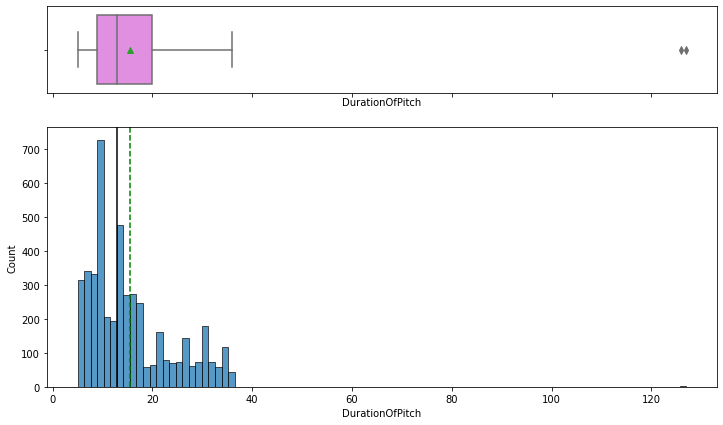

In [787]:
histogram_boxplot(data, "DurationOfPitch")

* The distribution of Duration of Pitch is skewed to left.
* There are outliers to the left of the distribution.
* The mean and the median are also close together.

In [788]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on Product Taken

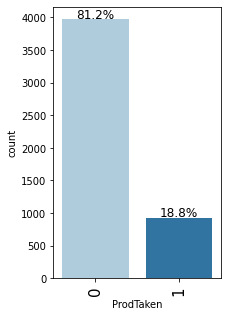

In [789]:
labeled_barplot(data, "ProdTaken", perc=True)

* 18.8% of customers did buy the vacation package.

### Observations on Type of Contract

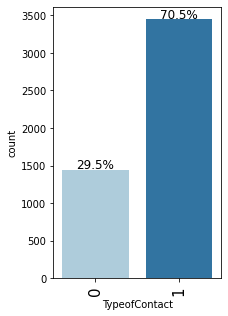

In [790]:
labeled_barplot(data, "TypeofContact", perc=True)

* 70.5% of customers reached out themselves about information on travel packages.

### Observations on City Tier

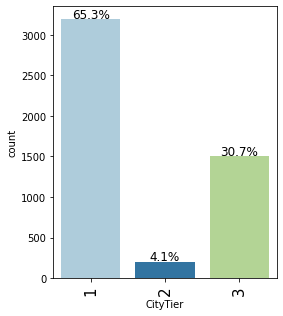

In [791]:
labeled_barplot(data, "CityTier", perc=True)

* 65.3% of customers are from tier 1 cities.
* 30.7% of customers are from tier 3 cities.

### Observations on Occupation

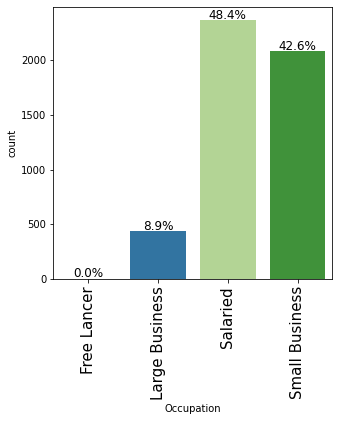

In [792]:
labeled_barplot(data, "Occupation", perc=True)

* 48.4% of customers are salaried.
* 42.6% of customers own small businesses
* Free Lancer had 0.0% of customers (2 customers)

### Observations on Gender

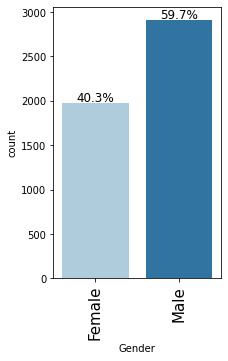

In [793]:
labeled_barplot(data, "Gender", perc=True)

* 59.7% of customers are male.

### Observations on Number of Person Visiting

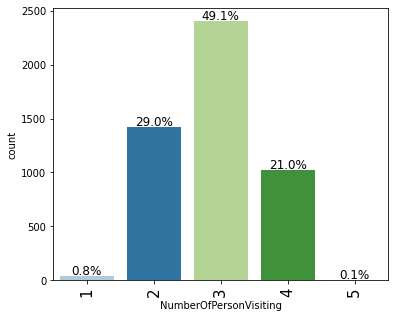

In [794]:
labeled_barplot(data, "NumberOfPersonVisiting", perc=True)

* Most customers have 3 people visiting at 49.1%.
* The next highest number of people visiting are 2 people at 29.0%.

### Observations on Preferred Property Star

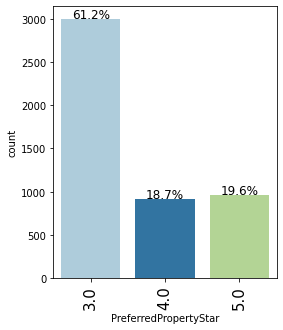

In [795]:
labeled_barplot(data, "PreferredPropertyStar", perc=True)

* Most customers prefer 3 star properties at 61.8%.
* This suggests most customers might prefer a more budget friendly property.

### Observations on Marital Status

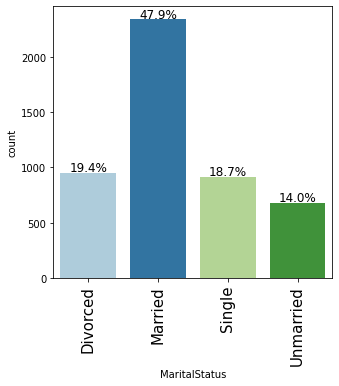

In [796]:
labeled_barplot(data, "MaritalStatus", perc=True)

* Almost half of the customers are married at 47.9%.
* Other customer marital status are almost evenly distributed.

### Observations on Number of Trips

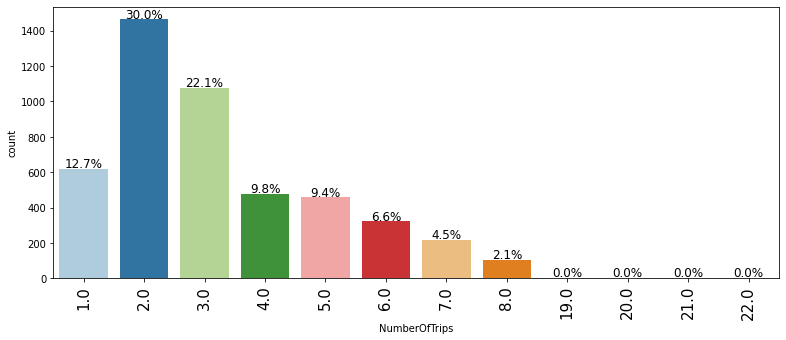

In [797]:
labeled_barplot(data, "NumberOfTrips", perc=True)

* A majority of customers have 2 trips
* There appears to be outliers after 8 trips.
* Outliers will be treated later in our analysis.

### Observations on Passport

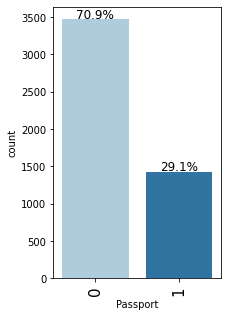

In [798]:
labeled_barplot(data, "Passport", perc=True)

* A majority of customers do not have a passport at 70.9%.

### Observations on Own Car

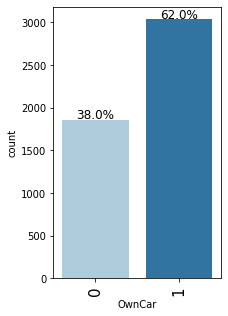

In [799]:
labeled_barplot(data, "OwnCar", perc=True)

* Most customers own a car at 62.0%.

### Observations on Number of Children Visiting

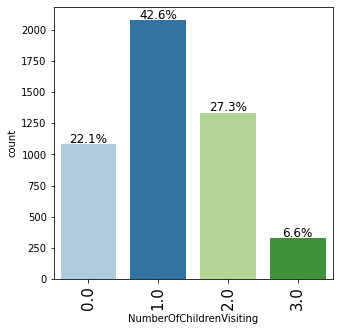

In [800]:
labeled_barplot(data, "NumberOfChildrenVisiting", perc=True)

* Most customers have 1 child visiting at 43.9%.
* 27.3% of customers have 2 children visiting.
* 22.1% of customers do not have any children visiting.

### Observations on Designation

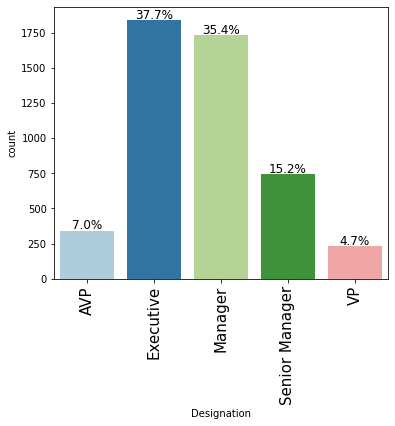

In [801]:
labeled_barplot(data, "Designation", perc=True)

* Most customers are either Executive or Manager at 37.7% and 35.4% respectively.

### Observations on Pitch Satisfaction Score

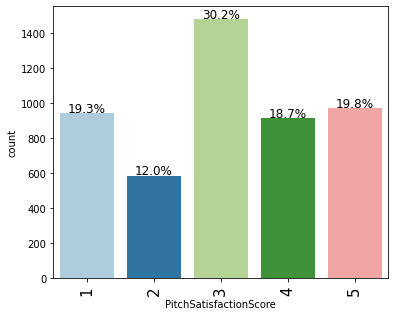

In [802]:
labeled_barplot(data, "PitchSatisfactionScore", perc=True)

* Most customers gave a satisfaction score of 3 at 30.2%
* 19.3% of customers gave a rating of 1.
* The amount of low satisfaction is concerning; we will note factors in our analysis.

### Observations on Product Pitched

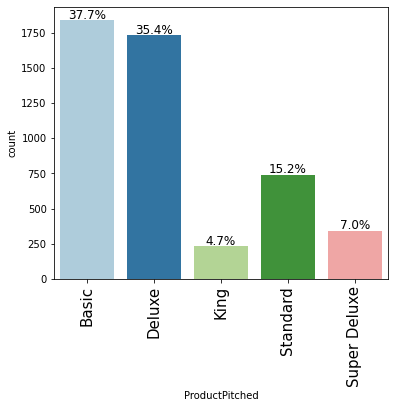

In [803]:
labeled_barplot(data, "ProductPitched", perc=True)

* Most customers were pitched the basic and deluxe package at 37.7% and 35.4%.
* Most salespeople pitch the more budget friendly options.

### Observations on Number of Followups

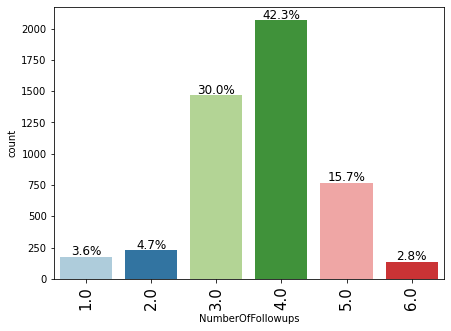

In [804]:
labeled_barplot(data, "NumberOfFollowups", perc=True)

* Most customers receive 3 or 4 follow ups at 30.0% and 43.2% respectively.

## Bivariate Analysis

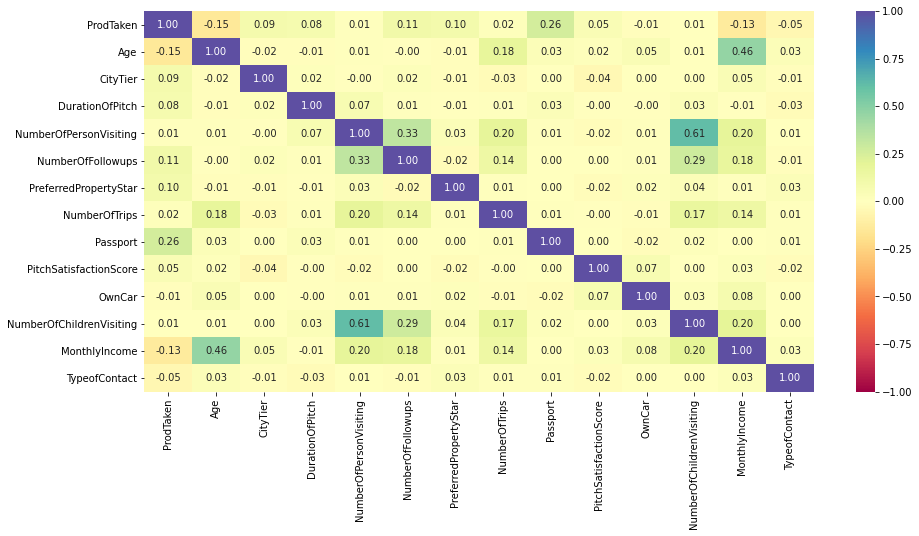

In [805]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Number of people visiting and the number of children visiting are highly correlated. There could be overlap in these two variables.

* We do also notice some correlation between monthly income and age.

* Monthly income and product taken have a negative correlation of -0.13.

In [806]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Type of Contact vs Product Taken

ProdTaken         0    1   All
TypeofContact                 
All            3968  920  4888
1              2837  607  3444
0              1131  313  1444
------------------------------------------------------------------------------------------------------------------------


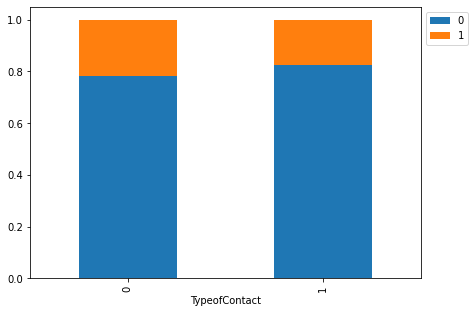

In [807]:
stacked_barplot(data, "TypeofContact", "ProdTaken")

* Almost 2/3rd of customers who self inquired on information also took the travel package

### City Tier vs Product Taken

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


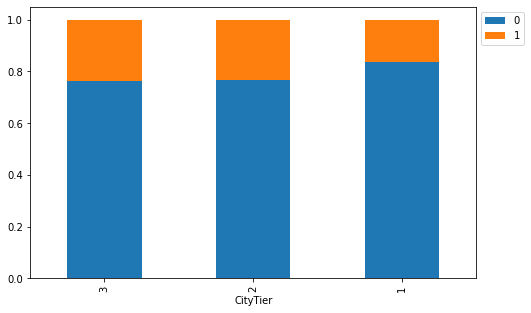

In [808]:
stacked_barplot(data, "CityTier", "ProdTaken")

* There were more customers in city tier 1 that took the travel package
* This could be interesting to investigate

### Occupation vs Product Taken

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


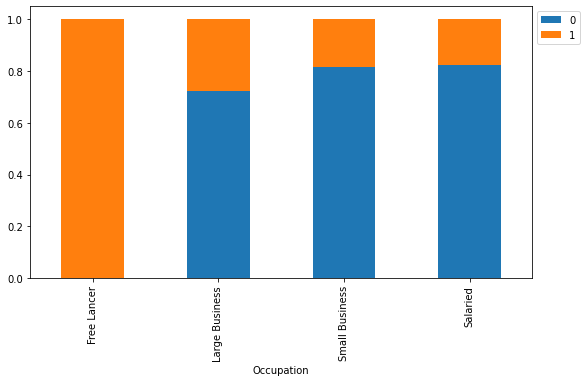

In [809]:
stacked_barplot(data, "Occupation", "ProdTaken")

* Most of the customers who took the travel package were either salaried or small business owners.
* All free lancer customers bought the travel package but there were only two free lancers in the data set.

### Gender vs Product Taken

ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1630  342  1972
------------------------------------------------------------------------------------------------------------------------


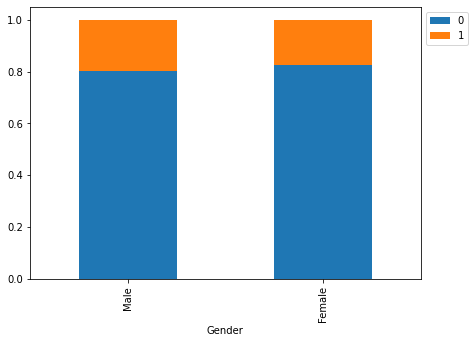

In [810]:
stacked_barplot(data, "Gender", "ProdTaken")

* The data suggests that more male customers take the travel package

### Number of Person Visiting vs Product Taken

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3968  920  4888
3                       1942  460  2402
2                       1151  267  1418
4                        833  193  1026
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


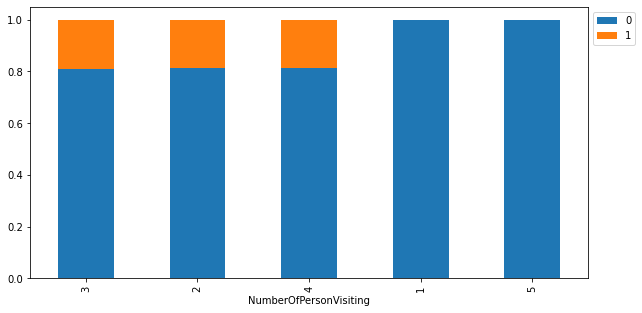

In [811]:
stacked_barplot(data, "NumberOfPersonVisiting", "ProdTaken")

* Customers who have one or five visitors do not take the travel package

### Preferred Property Star vs Product Taken

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3948  914  4862
3.0                    2511  482  2993
5.0                     706  250   956
4.0                     731  182   913
------------------------------------------------------------------------------------------------------------------------


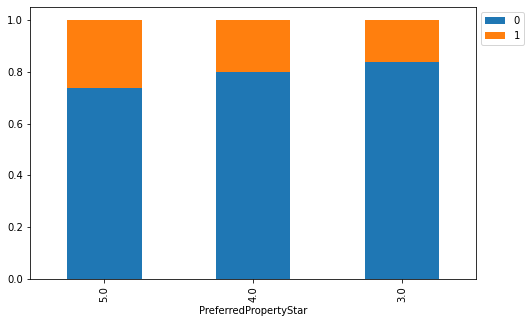

In [812]:
stacked_barplot(data, "PreferredPropertyStar", "ProdTaken")

* Most customers prefer 3 star properties compared to higher star properties
* This could suggest that more budget friendly properties are more appealing

### Marital Status vs Product Taken

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


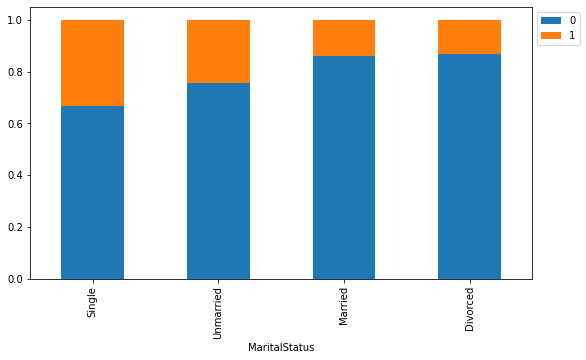

In [813]:
stacked_barplot(data, "MaritalStatus", "ProdTaken")

* Most customers who take the travel package are either Single or Married

### Number of Trips vs Product Taken

ProdTaken         0    1   All
NumberOfTrips                 
All            3840  908  4748
2.0            1165  299  1464
3.0             862  217  1079
1.0             508  112   620
6.0             258   64   322
5.0             396   62   458
7.0             156   62   218
4.0             417   61   478
8.0              76   29   105
19.0              0    1     1
20.0              0    1     1
21.0              1    0     1
22.0              1    0     1
------------------------------------------------------------------------------------------------------------------------


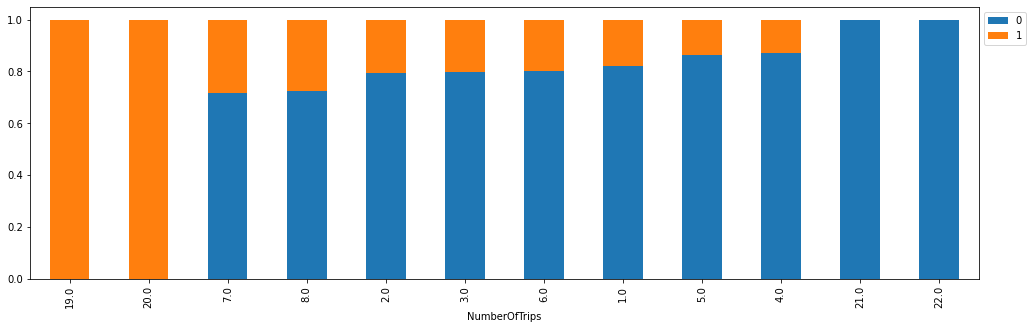

In [814]:
stacked_barplot(data, "NumberOfTrips", "ProdTaken")

* Customers who take two or three trips are more likely to take the travel package according to this sample.

### Passport vs Product Taken

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


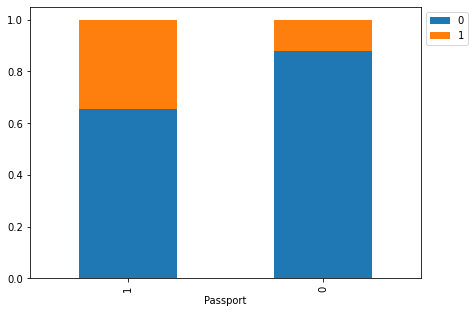

In [815]:
stacked_barplot(data, "Passport", "ProdTaken")

* The number of customers who took the travel package are almost evenly split between customers who have a passport and customers who do not.

### Own Car vs Product Taken

ProdTaken     0    1   All
OwnCar                    
All        3968  920  4888
1          2472  560  3032
0          1496  360  1856
------------------------------------------------------------------------------------------------------------------------


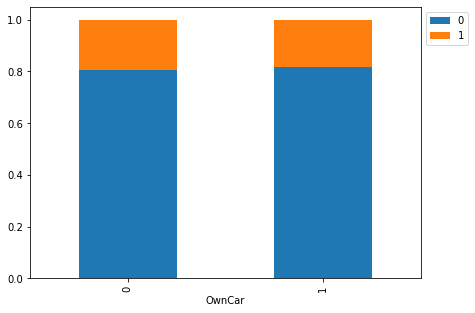

In [816]:
stacked_barplot(data, "OwnCar", "ProdTaken")

* More customers who own a car also took the travel package.

### Number of Children Visiting vs Product Taken

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
All                       3909  913  4822
1.0                       1688  392  2080
2.0                       1082  253  1335
0.0                        880  202  1082
3.0                        259   66   325
------------------------------------------------------------------------------------------------------------------------


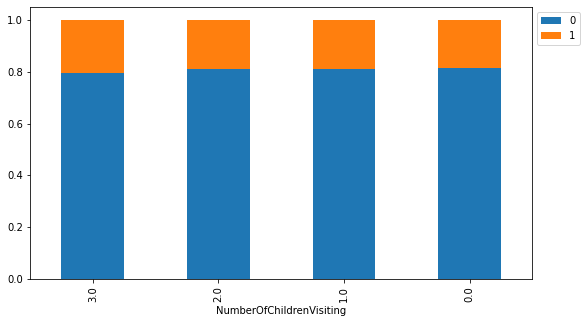

In [817]:
stacked_barplot(data, "NumberOfChildrenVisiting", "ProdTaken")

* More customers with one child visiting also bought a travel package
* Less customers with three children bought a travel package

### Designation vs Product Taken

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


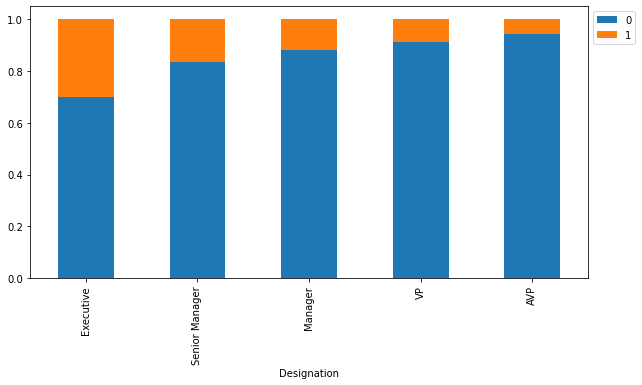

In [818]:
stacked_barplot(data, "Designation", "ProdTaken")

* There were more customers who were executives that bought a travel package
* AVP and VP had the least number of customers who bought packages, but they also had significantly smaller representation.

### Pitch Satisfaction Score vs Product Taken

ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3968  920  4888
3                       1162  316  1478
5                        760  210   970
4                        750  162   912
1                        798  144   942
2                        498   88   586
------------------------------------------------------------------------------------------------------------------------


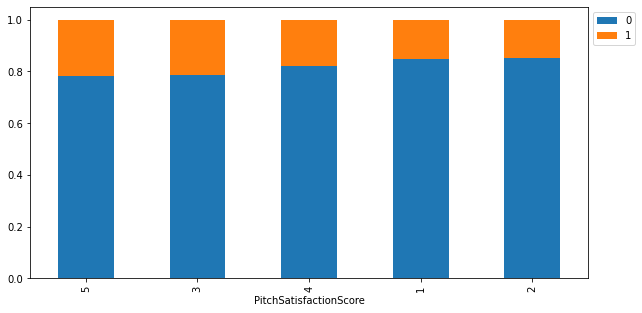

In [819]:
stacked_barplot(data, "PitchSatisfactionScore", "ProdTaken")

* On average most pitch scores were 3 for satisfaction

### Product Pitched vs Product Taken

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


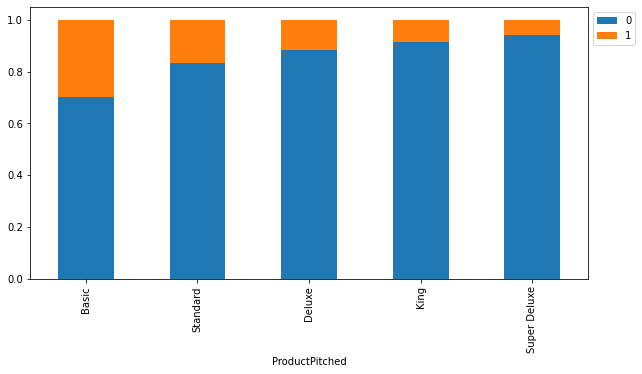

In [820]:
stacked_barplot(data, "ProductPitched", "ProdTaken")

* Customers who were pitched the Basic or Deluxe package were more likely to buy the package
* Less customers who were pitched the higher end packages were less likely to buy the travel package

### Number of Follow Ups vs Product Taken

ProdTaken             0    1   All
NumberOfFollowups                 
All                3931  912  4843
4.0                1689  379  2068
3.0                1222  244  1466
5.0                 577  191   768
6.0                  82   54   136
2.0                 205   24   229
1.0                 156   20   176
------------------------------------------------------------------------------------------------------------------------


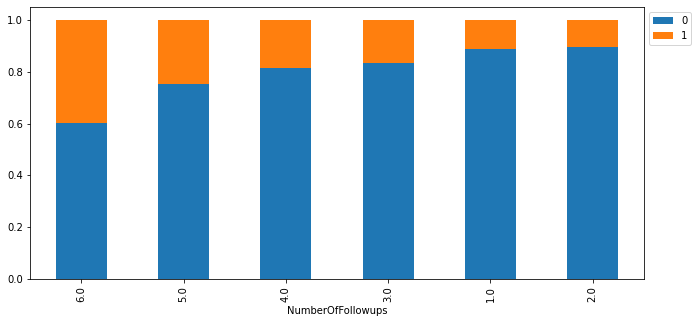

In [821]:
stacked_barplot(data, "NumberOfFollowups", "ProdTaken")

* Customers who had three to four follow ups bought travel package. 
* The data would suggest that more follow ups are required to increase the likelihood of a package being purchased.

In [822]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Age vs Product Taken

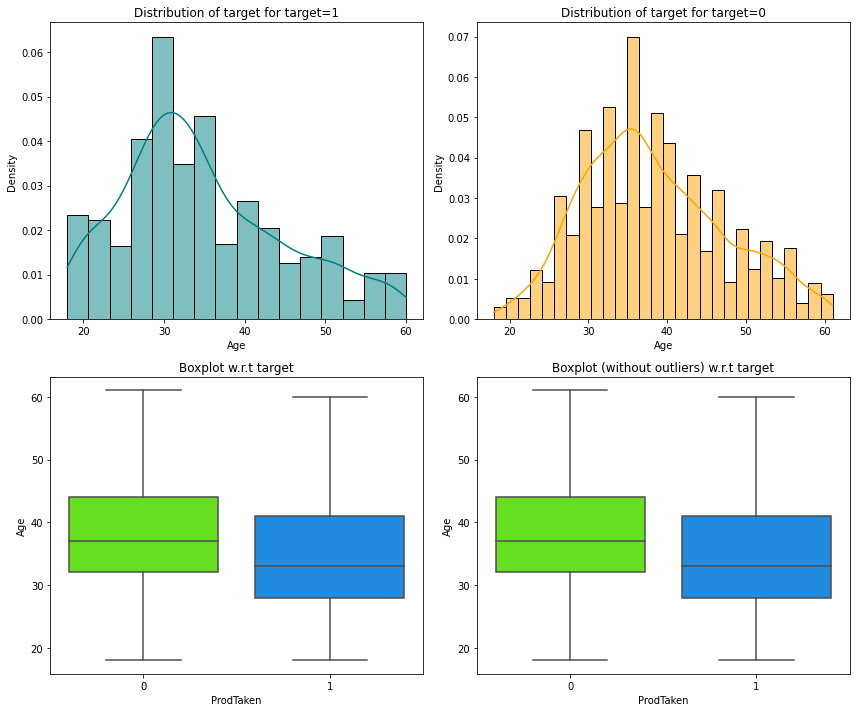

In [823]:
distribution_plot_wrt_target(data, "Age", "ProdTaken")

* The distribution for both outcomes are similarly distributed
* There are more customers with median age who did not take the product

### Personal Monthly Income vs Product Taken

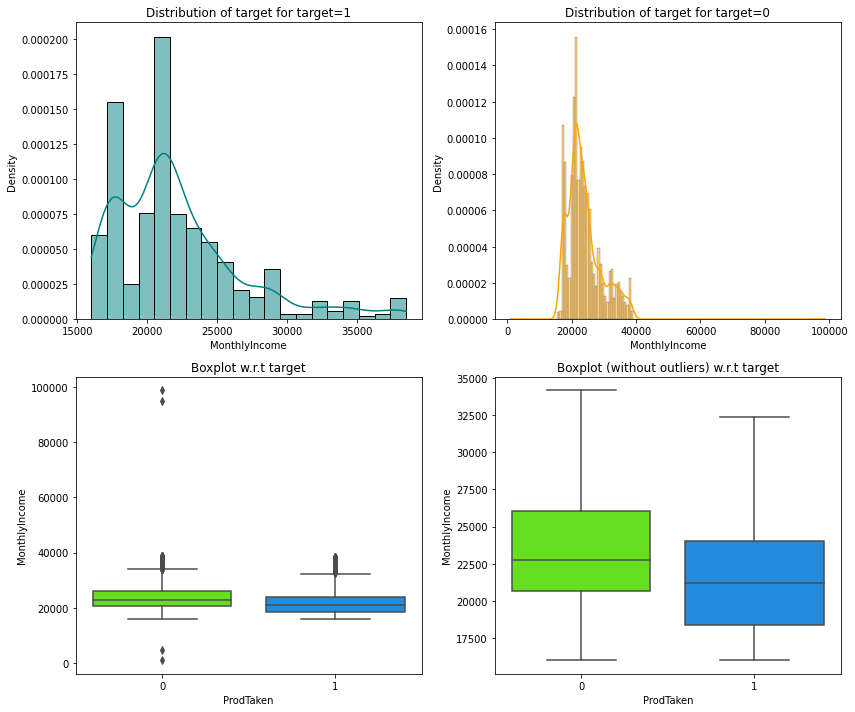

In [824]:
distribution_plot_wrt_target(data, "MonthlyIncome", "ProdTaken")

* There is a wider spread of the data for customers who took the product.
* Customers who did not take the product are mostly centered around a specific range of income.

### Personal Duration of Pitch vs Product Taken

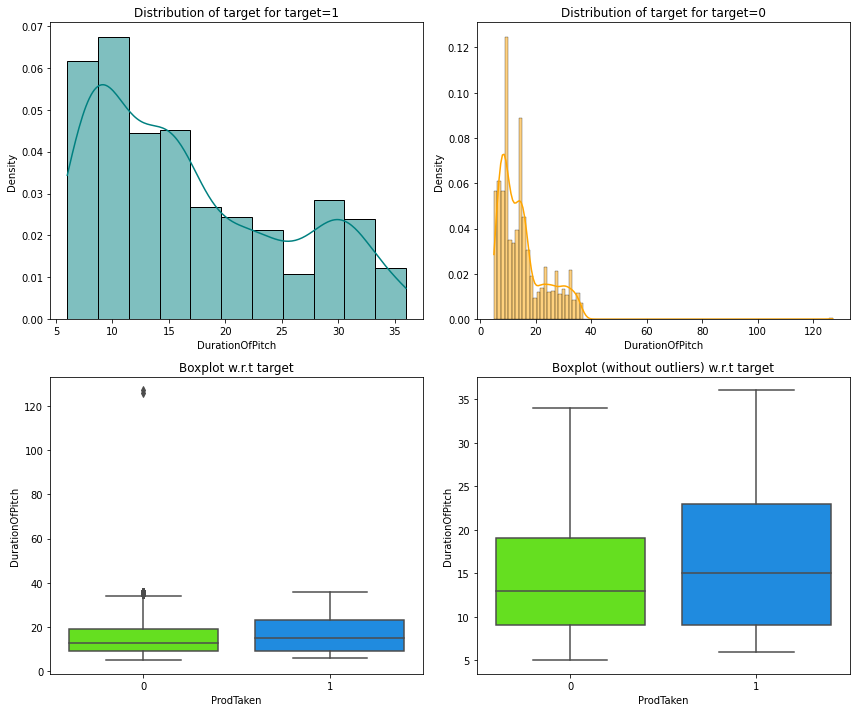

In [825]:
distribution_plot_wrt_target(data, "DurationOfPitch", "ProdTaken")

* The duration of the sales pitch for customers who took the product was within a narrow range.
* There was a much wider range for customers who did not take the product with a large concentration that overlapped the duration for customers who did take the product.

### Filling missing values

* We must start by backfilling all null and na values with zero so we can fill in the missing values with the median. 

In [826]:
# we will replace missing values in every column with its median
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
data[numeric_columns] = data[numeric_columns].apply(medianFiller, axis=0)

In [827]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4888 non-null   float64
 2   CityTier                  4888 non-null   int64  
 3   DurationOfPitch           4888 non-null   float64
 4   Occupation                4888 non-null   object 
 5   Gender                    4888 non-null   object 
 6   NumberOfPersonVisiting    4888 non-null   int64  
 7   NumberOfFollowups         4888 non-null   float64
 8   ProductPitched            4888 non-null   object 
 9   PreferredPropertyStar     4888 non-null   float64
 10  MaritalStatus             4888 non-null   object 
 11  NumberOfTrips             4888 non-null   float64
 12  Passport                  4888 non-null   int64  
 13  PitchSatisfactionScore    4888 non-null   int64  
 14  OwnCar  

* Now all numeric columns have been backfilled with the median value of the column.
* Type of Contact still has missing values as it is an object.

### Outliers

* Here we will investigate the outliers as most of our numeric data is skewed with several outliers. 
* We will investigate to confirm this claim.

In [828]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

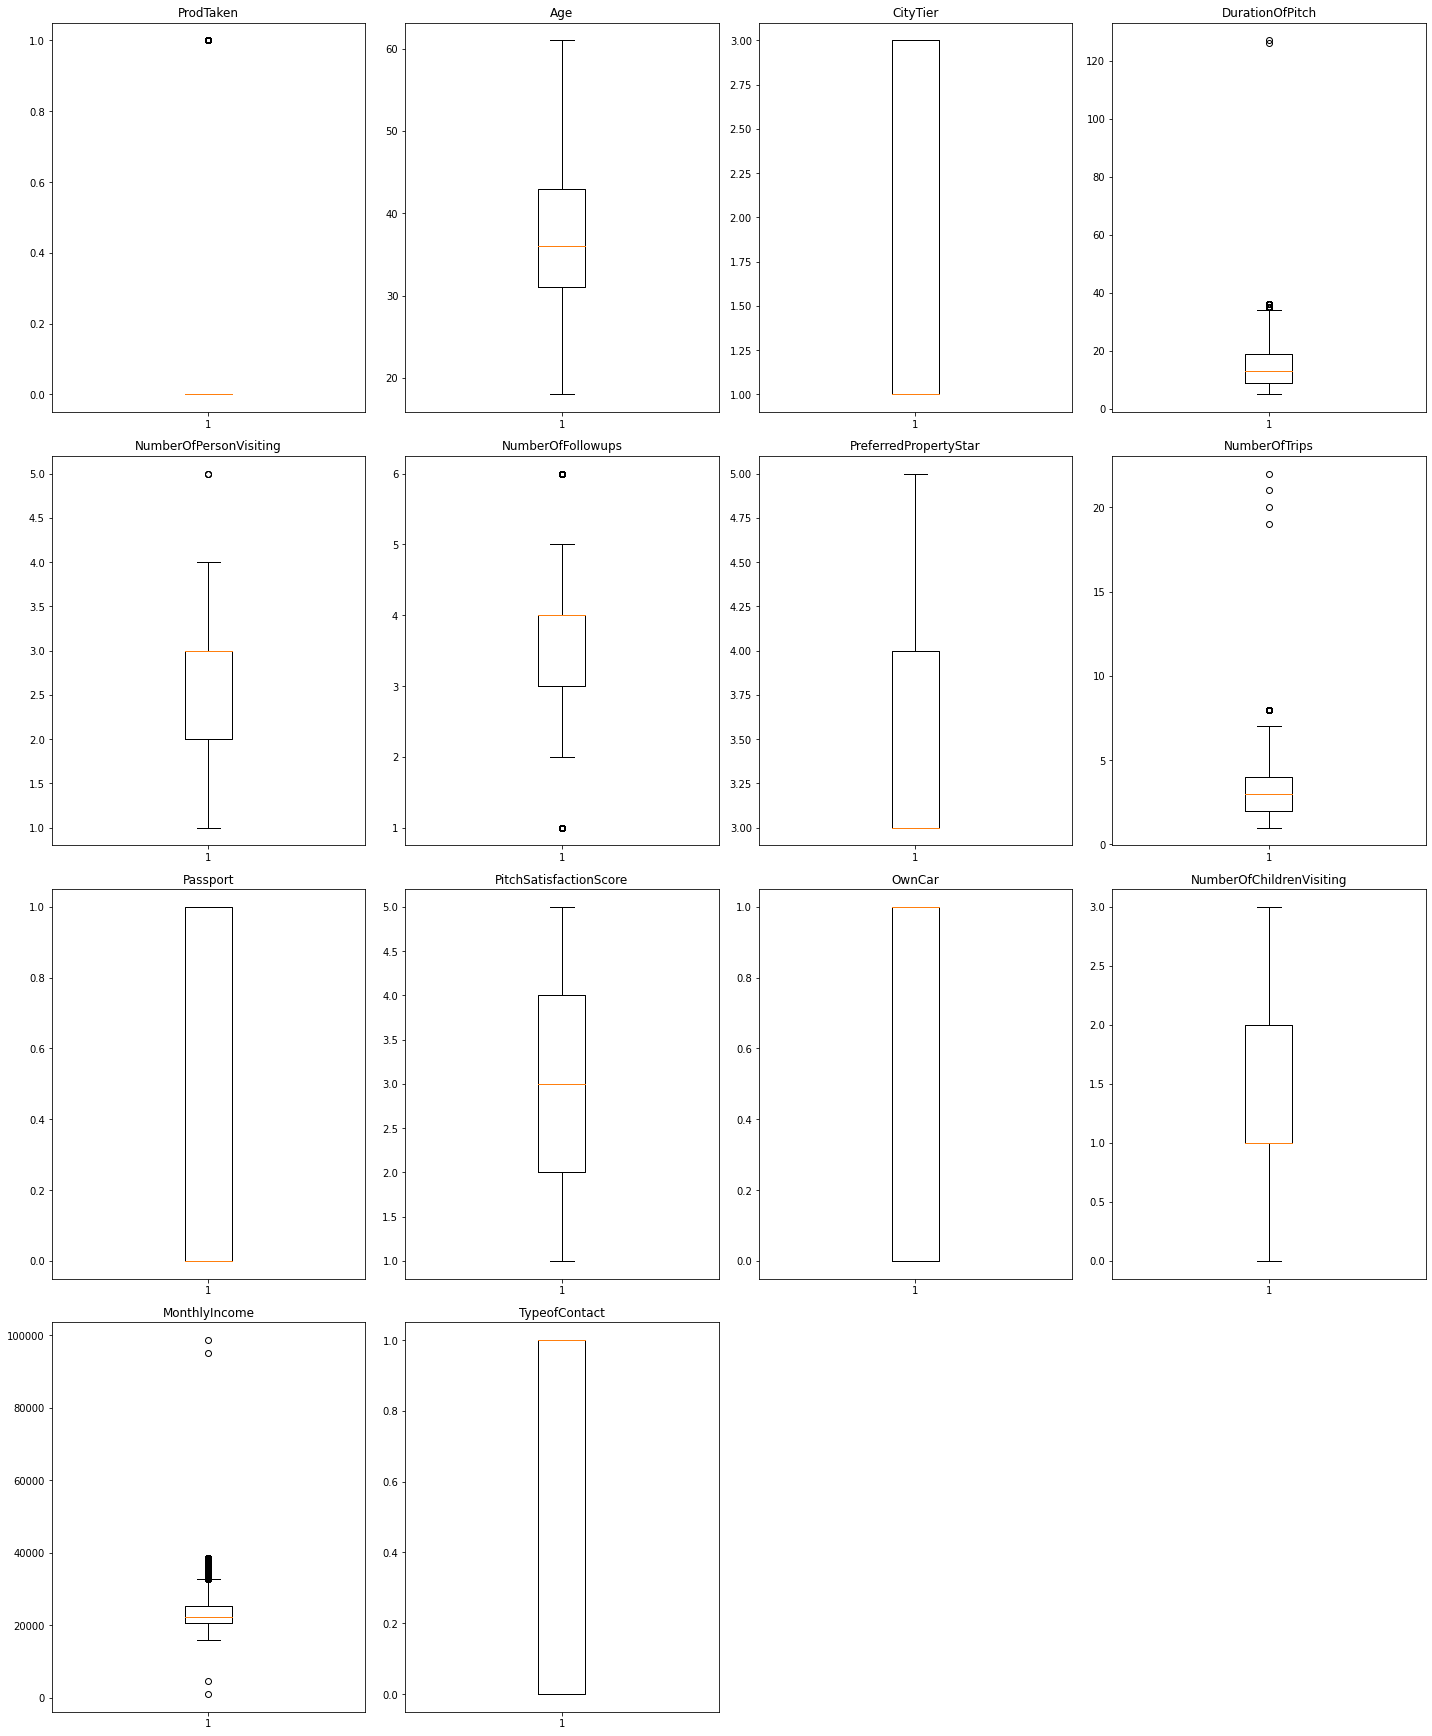

In [829]:
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Three of our variables appear to have outliers: Duration of Pitch, Number of Trips, and Monthly Income

* We will treat only these three variable for outliers.

* We will exclude the other variables as they either do not have outliers or they have values of 1 or 0.

### Outlier Treatment

In [830]:
# Let's treat outliers by flooring and capping
def treat_outliers(data, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    cars: dataframe
    col: name of the column
    """
    Q1 = data[col].quantile(0.25)  # 25th quantile
    Q3 = data[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker)

    return data


def treat_outliers_all(data, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    cars: data frame
    """
    for c in col_list:
        data = treat_outliers(data, c)

    return data

In [831]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
data = treat_outliers_all(data, data[['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']])

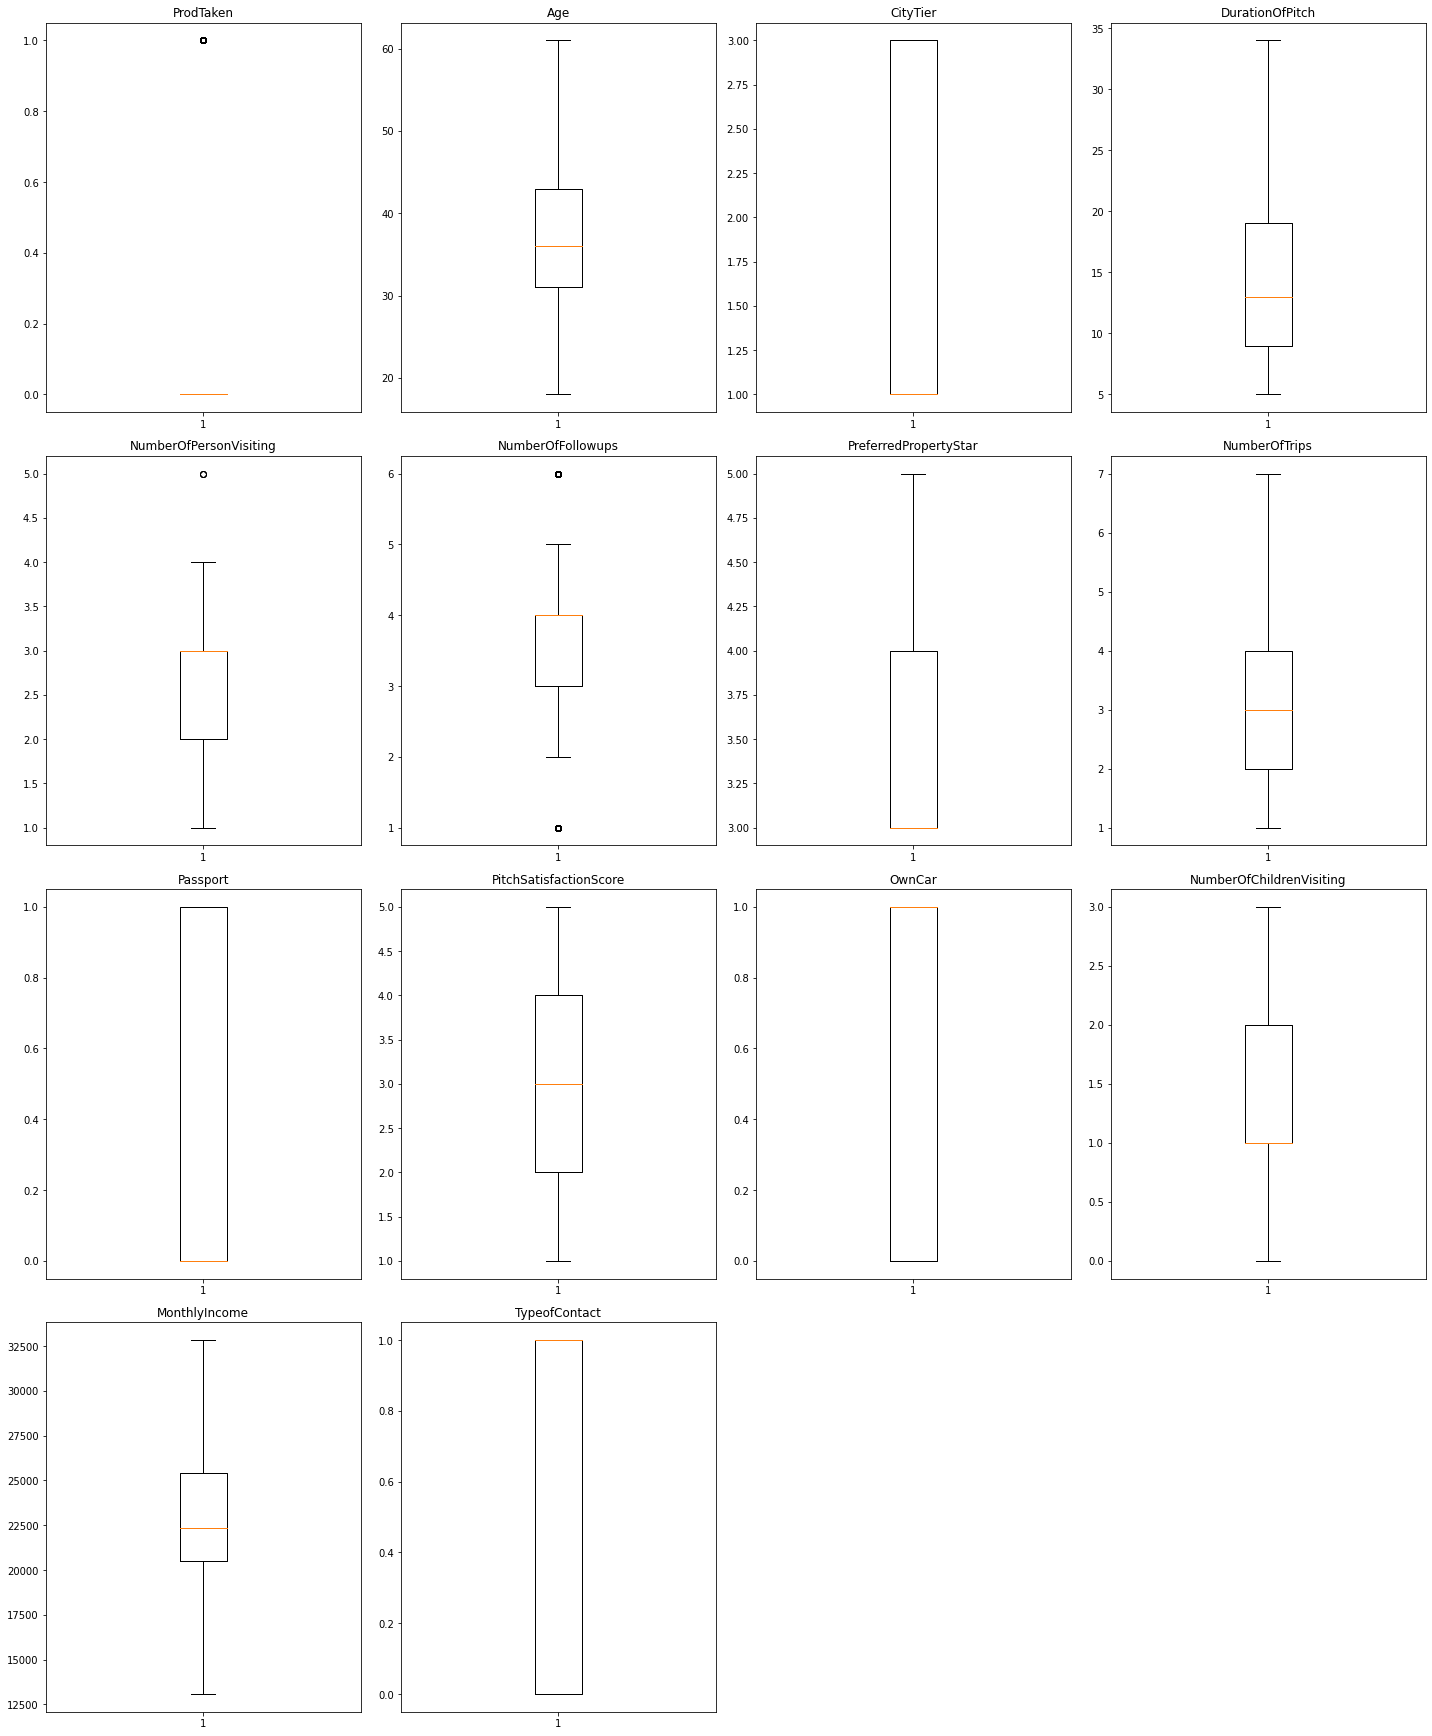

In [832]:
# Verifying via box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* All numerical variables that had outliers have been treated.
* Only the target variables have been treated for outliers.

## Splitting the Data

In [833]:
# defining X and y variables
X = data.drop(["ProdTaken","PitchSatisfactionScore","ProductPitched","NumberOfFollowups","DurationOfPitch"], axis=1)
y = data[["ProdTaken"]]

print(X.head())
print(y.head())

    Age  CityTier      Occupation  Gender  NumberOfPersonVisiting  \
0  41.0         3        Salaried  Female                       3   
1  49.0         1        Salaried    Male                       3   
2  37.0         1     Free Lancer    Male                       3   
3  33.0         1        Salaried  Female                       2   
4  36.0         1  Small Business    Male                       2   

   PreferredPropertyStar MaritalStatus  NumberOfTrips  Passport  OwnCar  \
0                    3.0        Single            1.0         1       1   
1                    4.0      Divorced            2.0         0       1   
2                    3.0        Single            7.0         1       0   
3                    3.0      Divorced            2.0         1       1   
4                    4.0      Divorced            1.0         0       1   

   NumberOfChildrenVisiting Designation  MonthlyIncome  TypeofContact  
0                       0.0     Manager        20993.0        

In [834]:
print(X.shape)
print(y.shape)

(4888, 14)
(4888, 1)


In [835]:
X = pd.get_dummies(X, columns=["Occupation","Gender","MaritalStatus","Designation"], drop_first=True)

In [836]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(3421, 21) (1467, 21)


In [837]:
X_train.head()

,Age,CityTier,NumberOfPersonVisiting,PreferredPropertyStar,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,TypeofContact,...,Occupation_Salaried,Occupation_Small Business,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
3234,34.0,1,3,3.0,6.0,0,0,1.0,25797.000,1,...,1,0,1,1,0,0,0,0,1,0
657,29.0,1,3,3.0,7.0,0,1,0.0,17532.000,1,...,0,1,0,1,0,0,1,0,0,0
150,40.0,1,2,4.0,2.0,0,1,0.0,20605.000,0,...,0,1,0,1,0,0,0,1,0,0
2745,19.0,3,4,3.0,3.0,0,1,3.0,19878.000,1,...,0,1,0,0,1,0,1,0,0,0
2567,52.0,1,3,3.0,3.0,0,1,1.0,32834.375,1,...,1,0,1,0,1,0,0,0,0,1


## Model evaluation criterion

### The model can make wrong predictions as:
1. Predicting a customer will buy a travel package when they did not buy a travel package.
2. Predicting a customer will not buy a travel package when they did buy a travel package.

### Which case is more important? 
1. If the model predicts a customer won't buy a travel package but it the customer indeed would then the company would incur the loss of a customer.
2. If the model predicts a customer will buy a travel package but the customer does not the company would lose time and resources that could be focused on potential customers. 

### Which metric to optimize?
* We would want F1-Score to be maximized, the greater the F1-Score higher the chances of predicting both the classes correctly.

In [838]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [839]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

## Building the models

### Decision Tree

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.871847  0.652174   0.661765  0.656934


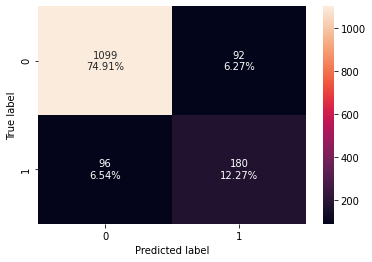

In [840]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
dtree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",dtree_model_train_perf)
dtree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",dtree_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(d_tree, X_test, y_test)

* The decision tree is overfitting the training data.
* We will try hyperparameter tuning and see if the model performance improves.

### Random Forest

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.893661  0.48913        0.9  0.633803


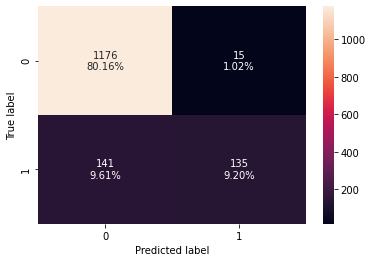

In [841]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

* Random forest is overfitting the training data as there is a huge difference between training and test scores for most of the metrics.
* The test recall is even lower than the decision tree but has a higher test precision.

### Bagging Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.994154  0.970497   0.998403  0.984252
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.903204  0.565217   0.876404  0.687225


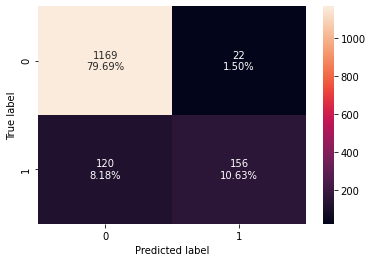

In [842]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print("Training performance:\n",bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print("Testing performance:\n",bagging_classifier_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

* Bagging classifier giving a similar performance as random forest.
* The Bagging classifier is not overfitting the training as much as the random forest or the decision tree.
* It is also overfitting the training data but higher test recall than decision trees.

## Hyperparameter Tuning

### Decision Tree Classifier

In [843]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.35,1:0.65},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,10), 
              'min_samples_leaf': [5, 7, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=6,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_samples_leaf=7, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0   0.82432  0.487578   0.536752  0.510985
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.838446  0.503623    0.58159  0.539806


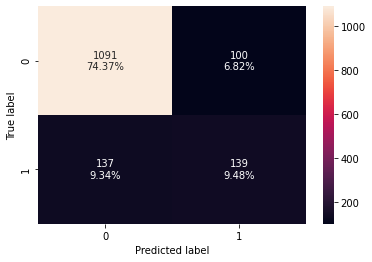

In [844]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

* The test recall has decreased significantly after hyperparameter tuning and the decision tree is giving a generalized performance.

### Tuning Bagging Classifier

In [845]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

**Let's check different metrics for bagging classifier with best hyperparameters and build a confusion matrix.**

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999708  0.998447        1.0  0.999223
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.907975  0.561594    0.91716  0.696629


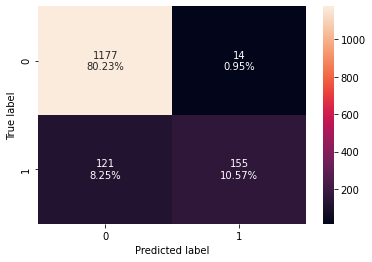

In [846]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print("Training performance:\n",bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print("Testing performance:\n",bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

### Insights
- We can see that train accuracy and recall for the bagging classifier have mostly remained the same.
- The model is overfitting the data, as train  recall are much higher than the test recall.

### Let's try using logistic regression as the base estimator for bagging classifier:
- Now, let's try and change the `base_estimator` of the bagging classifier, which is a decision tree by default.
- We will pass the logistic regression as the base estimator for bagging classifier.

In [847]:
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(random_state=1),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(random_state=1),
                  random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0   0.82549  0.082298   0.898305  0.150782
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.822086  0.072464        0.8  0.13289


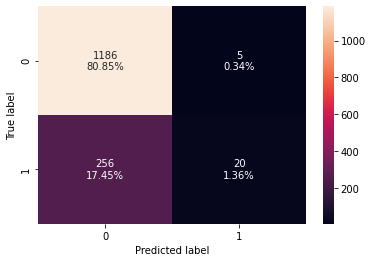

In [876]:
#Calculating different metrics
lr_bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_lr,X_train,y_train)
print("Training performance:\n",bagging_estimator_tuned_model_train_perf)
lr_bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_lr,X_test,y_test)
print("Testing performance:\n",bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_lr, X_test, y_test)

### Insights
- Bagging classifier with logistic regression as base_estimator is not overfitting the data but the test recall is low.
- Ensemble models are less interpretable than decision tree but bagging classifier is even less interpretable than random forest. It does not even have a feature importance attribute.

### Random Forest Classifier

In [849]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [200,500],
    "max_features":[.5,.7]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.7, n_estimators=200, random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.913429  0.608696   0.898396  0.725702


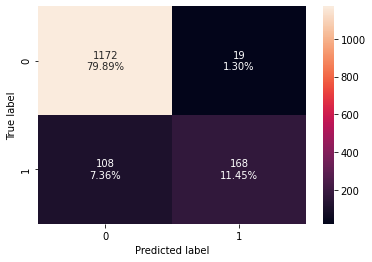

In [850]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_estimator_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_estimator_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator_tuned, X_test, y_test)

### Insights
- We can see that random forest's performance has increased as compared to the random forest model with default parameters.
- Model is still overfitting the data but not as much as the tuned bagging classifier.
- The test recall is still very low but improved compared to the random forest with the default parameters.

### Using class_weights for random forest:

- We can choose class_weights={0:0.3,1:0.7} because that is the original imbalance in our data.

In [890]:
# Choose the type of classifier. 
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.3, 1: 0.7}],
    "n_estimators": [200,500],
    "max_features":[.5,.7]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_features=0.7,
                       n_estimators=500, random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.912747  0.59058    0.91573  0.718062


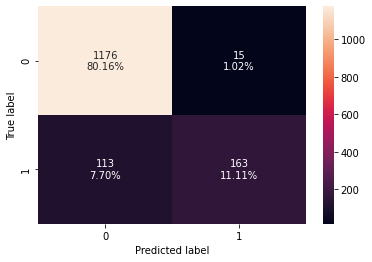

In [895]:
#Calculating different metrics
rf_estimator_weighted_score_train=model_performance_classification_sklearn(rf_estimator_weighted,X_train,y_train)
print("Training performance:\n",rf_estimator_weighted_score_train)
rf_estimator_weighted_score_test=model_performance_classification_sklearn(rf_estimator_weighted,X_test,y_test)
print("Testing performance:\n",rf_estimator_weighted_score_test)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator_weighted, X_test, y_test)

### Insights
- The model accuracy has has mostly remained the same and is overall still overfitting.
- We see improved test precision and a drop in recall.

### Checking the feature importance

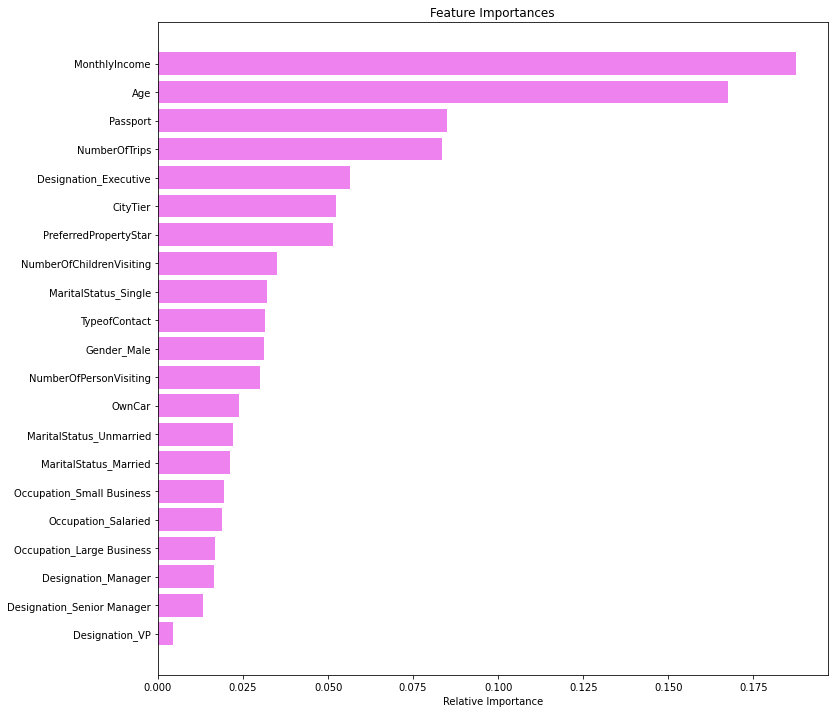

In [853]:
importances = rf_estimator_weighted.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Monthly income, age, and passport are the top 3 features.

### Feature importance of tuned decision tree

In [854]:
# Text report showing the rules of a decision tree -
feature_names = list(X_train.columns)
print(tree.export_text(dtree_estimator,feature_names=feature_names,show_weights=True))

|--- Passport <= 0.50
|   |--- MaritalStatus_Single <= 0.50
|   |   |--- CityTier <= 1.50
|   |   |   |--- weights: [409.50, 67.60] class: 0
|   |   |--- CityTier >  1.50
|   |   |   |--- PreferredPropertyStar <= 4.50
|   |   |   |   |--- weights: [175.70, 44.85] class: 0
|   |   |   |--- PreferredPropertyStar >  4.50
|   |   |   |   |--- Age <= 46.50
|   |   |   |   |   |--- Age <= 43.50
|   |   |   |   |   |   |--- weights: [25.90, 16.25] class: 0
|   |   |   |   |   |--- Age >  43.50
|   |   |   |   |   |   |--- weights: [1.05, 7.15] class: 1
|   |   |   |   |--- Age >  46.50
|   |   |   |   |   |--- weights: [9.45, 0.00] class: 0
|   |--- MaritalStatus_Single >  0.50
|   |   |--- Age <= 31.50
|   |   |   |--- Occupation_Large Business <= 0.50
|   |   |   |   |--- weights: [28.70, 26.00] class: 0
|   |   |   |--- Occupation_Large Business >  0.50
|   |   |   |   |--- weights: [1.40, 11.05] class: 1
|   |   |--- Age >  31.50
|   |   |   |--- PreferredPropertyStar <= 4.50
|   |   |   

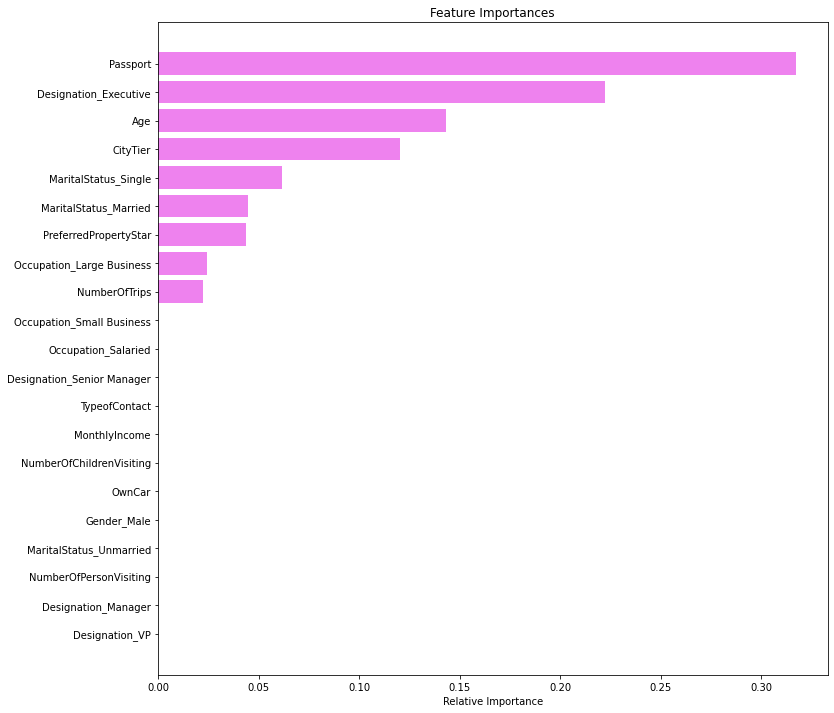

In [855]:
feature_names = X_train.columns
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Passport, designation - executive, and age are the top 3 features.

## Comparing all the models

In [856]:
# defining list of models
models = [bagging_classifier,bagging_estimator_tuned,bagging_lr,rf_estimator,rf_estimator_tuned,
          rf_estimator_weighted]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [886]:
# training performance comparison

train_comparison_frame = pd.concat(
    [bagging_classifier_model_train_perf.T,
     bagging_estimator_tuned_model_train_perf.T,
     lr_bagging_estimator_tuned_model_train_perf.T,
     dtree_model_train_perf.T,
     dtree_estimator_model_train_perf.T,
     rf_estimator_model_train_perf.T,
     rf_tuned_model_train_perf.T,
     rf_estimator_weighted_score_train.T
    ],
    axis=1,
)
train_comparison_frame.columns = [
    "Bagging classifier with default parameters",
    "Tuned Bagging Classifier",
    "Bagging classifier with base_estimator=LR",
    "Decision Tree with default parameters",
    "Tuned Decision Tree Classifier",
    "Random Forest with deafult parameters",
    "Tuned Random Forest Classifier",
    "Random Forest with class_weights"
    ]

In [892]:
# test performance comparison

test_comparison_frame = pd.concat(
    [bagging_classifier_model_test_perf.T,
     bagging_estimator_tuned_model_test_perf.T,
     lr_bagging_estimator_tuned_model_test_perf.T,
     dtree_model_test_perf.T,
     dtree_estimator_model_test_perf.T,
     rf_estimator_model_test_perf.T,
     rf_tuned_model_test_perf.T,
     rf_estimator_weighted_score_test.T
    ],
    axis=1,
)
test_comparison_frame.columns = [
    "Bagging classifier with default parameters",
    "Tuned Bagging Classifier",
    "Bagging classifier with base_estimator=LR",
    "Decision Tree with default parameters",
    "Tuned Decision Tree Classifier",
    "Random Forest with deafult parameters",
    "Tuned Random Forest Classifier",
    "Random Forest with class_weights"
    ]

In [893]:
print('Train comparison table')
train_comparison_frame

Train comparison table


,Bagging classifier with default parameters,Tuned Bagging Classifier,Bagging classifier with base_estimator=LR,Decision Tree with default parameters,Tuned Decision Tree Classifier,Random Forest with deafult parameters,Tuned Random Forest Classifier,Random Forest with class_weights
Accuracy,0.994154,0.825490,0.825490,1.0,0.824320,1.0,1.0,1.0
Recall,0.970497,0.082298,0.082298,1.0,0.487578,1.0,1.0,1.0
Precision,0.998403,0.898305,0.898305,1.0,0.536752,1.0,1.0,1.0
F1,0.984252,0.150782,0.150782,1.0,0.510985,1.0,1.0,1.0


In [894]:
print('Test comparison table')
test_comparison_frame

Test comparison table


,Bagging classifier with default parameters,Tuned Bagging Classifier,Bagging classifier with base_estimator=LR,Decision Tree with default parameters,Tuned Decision Tree Classifier,Random Forest with deafult parameters,Tuned Random Forest Classifier,Random Forest with class_weights
Accuracy,0.903204,0.822086,0.822086,0.871847,0.838446,0.893661,0.913429,0.912747
Recall,0.565217,0.072464,0.072464,0.652174,0.503623,0.489130,0.608696,0.590580
Precision,0.876404,0.800000,0.800000,0.661765,0.581590,0.900000,0.898396,0.915730
F1,0.687225,0.132890,0.132890,0.656934,0.539806,0.633803,0.725702,0.718062


## Conclusion
* We can see that three variables - Passport, Age, and Monthly Income are the most important factors in identifying persons who are likely to buy a travel package. Other variables' importance is not as significant. 
* Identifying what features influence customers to purchase travel packages will help identify and focus sales to certain demographics of customers.
* This will help sales reduce wasted time pitching to customers who are less likely to purchase a travel package.
* As per the decision tree business rules:
    - Customers who do not have a passport and who are not single and who live in a city tier >1 and who prefer property star >4 and are age > 43 are more likely to buy a travel package.
    - Customers who do not have a passport who are single and are age <32 who own large business are more likely to buy a travel package.
    - Customers with a passport who are executives are likely to buy a travel package regardless of their age
* Based on the above analysis, we can say that:
    - Middle-aged to older customers who are looking to stay at a higher rated property are more likely to purchase a travel package.
    - Younger single customers without a passport find travel packages more appealing and are more likely to purchase one if they own a large business. 
    - Customers who are executives and own a passport are highly likely to buy a travel package. 

## Boosting

## AdaBoost Classifier

   Accuracy   Recall  Precision      F1
0  0.844782  0.27795   0.730612  0.4027
   Accuracy    Recall  Precision        F1
0  0.835719  0.271739   0.652174  0.383632


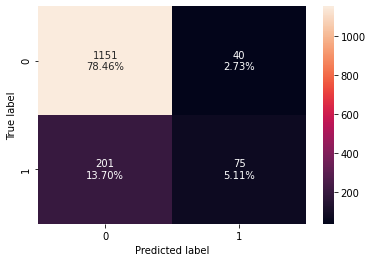

In [858]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

* Adaboost is giving more generalized performance than previous models but the test f1-score is too low. 

### Hyperparameter Tuning

In [859]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.1, n_estimators=100, random_state=1)

   Accuracy    Recall  Precision       F1
0  0.975738  0.903727   0.965174  0.93344
   Accuracy    Recall  Precision        F1
0  0.861622  0.572464   0.650206  0.608863


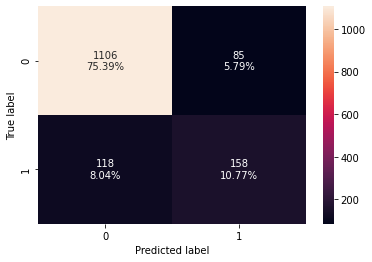

In [860]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

* The model performance has increased slightly but the model has started to overfit the training data.

## Gradient Boosting Classifier

Training performance:
    Accuracy   Recall  Precision        F1
0  0.879567  0.43323   0.855828  0.575258
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.861622  0.365942   0.782946  0.498765


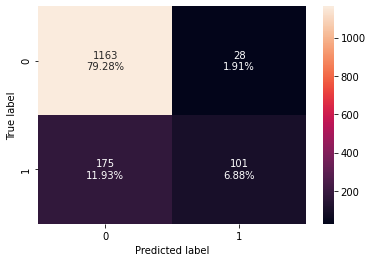

In [861]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

* The gradient boosting classifier is overfitting the training data slightly.
* F1 scores are still low.

### Hyperparameter Tuning

In [862]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=250, random_state=1,
                           subsample=1)

Training performance:
    Accuracy   Recall  Precision        F1
0  0.902952  0.53882   0.908377  0.676413
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.875937  0.438406   0.817568  0.570755


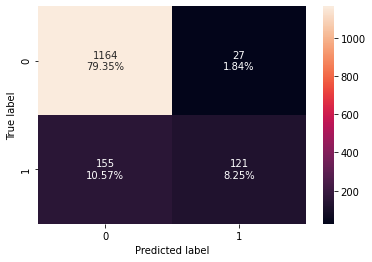

In [863]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

* There is an overall improvement on both training and test output.

## XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.997077  0.984472        1.0  0.992175
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.899796  0.568841   0.848649  0.681128


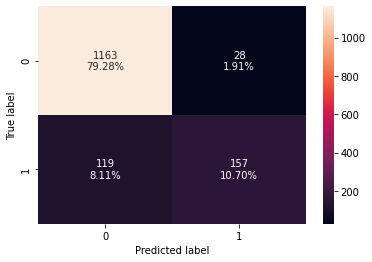

In [864]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

* Xgboost classifier is slightly overfitting the training data.
* We will try hyperparameter tuning and see if the model performance improves.  

### Hyperparameter Tuning

In [865]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Training performance:
    Accuracy    Recall  Precision       F1
0  0.940953  0.968944   0.774194  0.86069
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.850034  0.764493   0.576503  0.657321


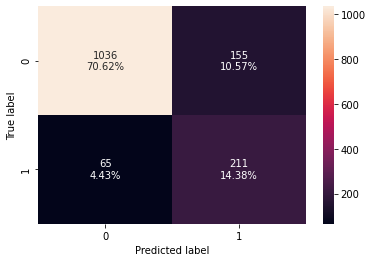

In [866]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

* The overfitting has reduced slightly.
* Testing recall has increased while testing precision has decreased.

## Stacking Classifier

In [867]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.35,
                                                                     1: 0.65},
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.7,
                                                           n_estimators=250,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.35,
                                                                     1: 0.65},
                                                       max_

Training performance:
    Accuracy  Recall  Precision        F1
0  0.997077     1.0   0.984709  0.992296
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.888889  0.84058   0.660969  0.740032


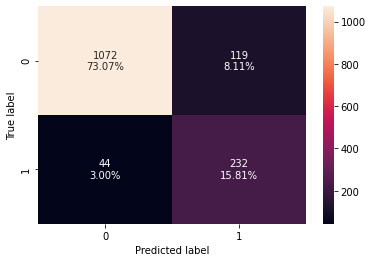

In [868]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

* The stacking classifier is giving a similar performance as compared to XGBoost with slightly less overfitting.

## Comparing all models

In [869]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,
     dtree_estimator_model_train_perf.T,
     rf_estimator_model_train_perf.T,
     rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,
     bagging_estimator_tuned_model_train_perf.T,
     ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,
     gb_classifier_model_train_perf.T,
     gbc_tuned_model_train_perf.T,
     xgb_classifier_model_train_perf.T,
     xgb_tuned_model_train_perf.T,
     stacking_classifier_model_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"
    ]

In [870]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,
     dtree_estimator_model_test_perf.T,
     rf_estimator_model_test_perf.T,
     rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,
     bagging_estimator_tuned_model_test_perf.T,
     ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,
     gb_classifier_model_test_perf.T,
     gbc_tuned_model_test_perf.T,
     xgb_classifier_model_test_perf.T,
     xgb_tuned_model_test_perf.T,
     stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]

In [875]:
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.824320,1.0,1.0,0.994154,0.825490,0.844782,0.975738,0.879567,0.902952,0.997077,0.940953,0.997077
Recall,1.0,0.487578,1.0,1.0,0.970497,0.082298,0.277950,0.903727,0.433230,0.538820,0.984472,0.968944,1.000000
Precision,1.0,0.536752,1.0,1.0,0.998403,0.898305,0.730612,0.965174,0.855828,0.908377,1.000000,0.774194,0.984709
F1,1.0,0.510985,1.0,1.0,0.984252,0.150782,0.402700,0.933440,0.575258,0.676413,0.992175,0.860690,0.992296


In [872]:
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.871847,0.838446,0.893661,0.913429,0.903204,0.822086,0.835719,0.861622,0.861622,0.875937,0.899796,0.850034,0.888889
Recall,0.652174,0.503623,0.489130,0.608696,0.565217,0.072464,0.271739,0.572464,0.365942,0.438406,0.568841,0.764493,0.840580
Precision,0.661765,0.581590,0.900000,0.898396,0.876404,0.800000,0.652174,0.650206,0.782946,0.817568,0.848649,0.576503,0.660969
F1,0.656934,0.539806,0.633803,0.725702,0.687225,0.132890,0.383632,0.608863,0.498765,0.570755,0.681128,0.657321,0.740032


* The majority of the models are overfitting the training data.
* The staking classifier is giving the highest f1-score on the test data and is giving more generalized performance.
* The tuned random forest has given the second-highest test f1-score but is overfitting the training data. 